## Importing Data From Google Drive Directly in to colab

##### You can Import data from kaggle too. Tutorial = https://www.kaggle.com/general/74235

In [0]:
!pip install PyDrive

#### Run this in you console of browser to get file directly from google drive

var url = "https://drive.google.com/file/d/1Z_kkqAXiBkfAd8VwX7FctK4FTwcAQM3w/view?usp=sharing"

function getIdFromUrl(url) { return url.match(/[-\w]{25,}/); }

getIdFromUrl(url) ##  This Generates the ID 

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':"1Z_kkqAXiBkfAd8VwX7FctK4FTwcAQM3w"})   # replace the id with id of file you want to access
downloaded.GetContentFile('ibm_data.csv')        # replace the file name with your file

In [0]:
downloaded

GoogleDriveFile({'id': '1Z_kkqAXiBkfAd8VwX7FctK4FTwcAQM3w', 'kind': 'drive#file', 'etag': '"StLURADGvFAD7O9Kbwy7cPbE-UU/MTU3ODIzNzU5ODM4MQ"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1Z_kkqAXiBkfAd8VwX7FctK4FTwcAQM3w', 'webContentLink': 'https://drive.google.com/uc?id=1Z_kkqAXiBkfAd8VwX7FctK4FTwcAQM3w&export=download', 'alternateLink': 'https://drive.google.com/file/d/1Z_kkqAXiBkfAd8VwX7FctK4FTwcAQM3w/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1Z_kkqAXiBkfAd8VwX7FctK4FTwcAQM3w/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': 'ibm_data.csv', 'mimeType': 'text/csv', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2020-01-05T15:19:58.381Z', 'modifiedDate': '2020-01-05T15:19:58.381Z', 'lastViewedByMeDate': '2020-04-03T13:27:15.337Z', 'markedViewedByMeDate': '1970-01-01T00:00:00.000Z', 

In [0]:
import pandas as pd
data = pd.read_csv('ibm_data.csv')

In [0]:
data

,Unnamed: 0,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,device_type,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts
0,0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,MOBILEPHONE,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100
1,1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,TABLET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300
2,2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,MOBILEPHONE,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900
3,3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,MOBILEPHONE,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300
4,4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,MOBILEPHONE,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1048568,United States,United States,North America,CUPERTINO,CALIFORNIA,NaN,NaN,MACINTOSH_OS X 10.14,e37ade1326801a855c9b2d1bdb1f84399547c27178a7e7...,MOZILLA/5.0 (MACINTOSH; INTEL MAC OS X 10_14_2...,1,0,1,www.ibm.com/talent-management/news/talent-acqu...,11,3,2019,2019-06-04 13:27:37.059600
1048569,1048569,Australia,Australia/NZ,Asia Pacific,SYDNEY,NEW SOUTH WALES,OPTUSNET.COM.AU,NaN,MACINTOSH_OS X 10.13,e926236cbc5da5db8bad29cdbb3537b867aa26e73a5f79...,MOZILLA/5.0 (MACINTOSH; INTEL MAC OS X 10_13_1...,1,0,1,www.ustream.tv/channel/nba4live,11,3,2019,2019-06-04 13:27:04.035100
1048570,1048570,United States,United States,North America,CLEVELAND,OHIO,PARKER.COM,NaN,MICROSOFT_WINDOWS10,3440973e4b965b19fa7e67b02c10ecb1d6ccc3c62e0d92...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/en/search/...,11,3,2019,2019-06-04 13:40:47.060500
1048571,1048571,Japan,Japan,Japan,CHIYODA-KU,TOKYO,ARGO-GRAPH.CO.JP,NaN,MICROSOFT_WINDOWS10,0ff0318b41d99bf2240173368a7d861ef512a85d0abf15...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www-945.ibm.com/support/fixcentral/options,11,3,2019,2019-06-04 13:22:12.001900


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from jupyterthemes import jtplot
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
## Statistics ##
print('########## Dataset Infomarion ##########')
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\n########## Features ##########\n" ,data.columns.tolist())
print ("\n Total Missing values : ",data.isnull().sum().values.sum())
print("\n########## Details for missing values : ##########\n", data.isnull().sum())

########## Dataset Infomarion ##########
Rows     :  1048573
Columns  :  19

########## Features ##########
 ['Unnamed: 0', 'ctry_name', 'intgrtd_mngmt_name', 'intgrtd_operating_team_name', 'city', 'st', 'sec_lvl_domn', 'device_type', 'operating_sys', 'ip_addr', 'user_agent', 'VISIT', 'ENGD_VISIT', 'VIEWS', 'page_url', 'wk', 'mth', 'yr', 'page_vw_ts']

 Total Missing values :  1258099

########## Details for missing values : ##########
 Unnamed: 0                          0
ctry_name                           0
intgrtd_mngmt_name                  0
intgrtd_operating_team_name         0
city                            46586
st                              45445
sec_lvl_domn                   319457
device_type                    842041
operating_sys                    1820
ip_addr                             0
user_agent                          6
VISIT                               0
ENGD_VISIT                          0
VIEWS                               0
page_url                   

In [0]:
## Dropping some unwanted columns ## 
## axis=1 specifies that it's a column.If we dont give anythng by default it will take as axis=0
## inplace=True makes sure that the changes are permanent 
data.drop('Unnamed: 0',axis=1,inplace=True)
data.drop('device_type',axis=1,inplace=True)

In [0]:
## Create a check point just for any future reference ## 
data_bp1 = data.copy()

In [0]:
## Lets do data.info to check what data types are present ## 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048573 entries, 0 to 1048572
Data columns (total 17 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   ctry_name                    1048573 non-null  object
 1   intgrtd_mngmt_name           1048573 non-null  object
 2   intgrtd_operating_team_name  1048573 non-null  object
 3   city                         1001987 non-null  object
 4   st                           1003128 non-null  object
 5   sec_lvl_domn                 729116 non-null   object
 6   operating_sys                1046753 non-null  object
 7   ip_addr                      1048573 non-null  object
 8   user_agent                   1048567 non-null  object
 9   VISIT                        1048573 non-null  int64 
 10  ENGD_VISIT                   1048573 non-null  int64 
 11  VIEWS                        1048573 non-null  int64 
 12  page_url                     1048572 non-null  object
 1

In [0]:
##Page_vw_ts is an obect ## 
# # Importing Datetime time module  and creating new column for days of week and Month to use it afterwards ## 
import datetime
data.page_vw_ts = pd.to_datetime(data.page_vw_ts)
data['date'] = pd.to_datetime(data.page_vw_ts)

In [0]:
data.date

0         2019-06-04 05:05:18.023100
1         2019-06-04 05:07:11.014300
2         2019-06-04 05:08:46.081900
3         2019-06-04 05:07:22.033300
4         2019-06-04 05:05:27.027700
                     ...            
1048568   2019-06-04 13:27:37.059600
1048569   2019-06-04 13:27:04.035100
1048570   2019-06-04 13:40:47.060500
1048571   2019-06-04 13:22:12.001900
1048572   2019-06-04 13:39:50.074200
Name: date, Length: 1048573, dtype: datetime64[ns]

In [0]:
## use this if you wan't to keep column as well
data.index = data.date

In [0]:
## setting index of dataframe to date for analysis
# data.set_index('date',inplace=True)

In [0]:
data.date

date
2019-06-04 05:05:18.023100   2019-06-04 05:05:18.023100
2019-06-04 05:07:11.014300   2019-06-04 05:07:11.014300
2019-06-04 05:08:46.081900   2019-06-04 05:08:46.081900
2019-06-04 05:07:22.033300   2019-06-04 05:07:22.033300
2019-06-04 05:05:27.027700   2019-06-04 05:05:27.027700
                                        ...            
2019-06-04 13:27:37.059600   2019-06-04 13:27:37.059600
2019-06-04 13:27:04.035100   2019-06-04 13:27:04.035100
2019-06-04 13:40:47.060500   2019-06-04 13:40:47.060500
2019-06-04 13:22:12.001900   2019-06-04 13:22:12.001900
2019-06-04 13:39:50.074200   2019-06-04 13:39:50.074200
Name: date, Length: 1048573, dtype: datetime64[ns]

In [0]:
## Let's see how the data is looking for 2019 and 2018 years 
data['2019'].shape
#data['2018'].shape
#data.isnull().sum()

(1045785, 18)

In [0]:
data['2018'].shape

(23, 18)

Text(0.5, 1.0, 'intgrtd_mngmt_name')

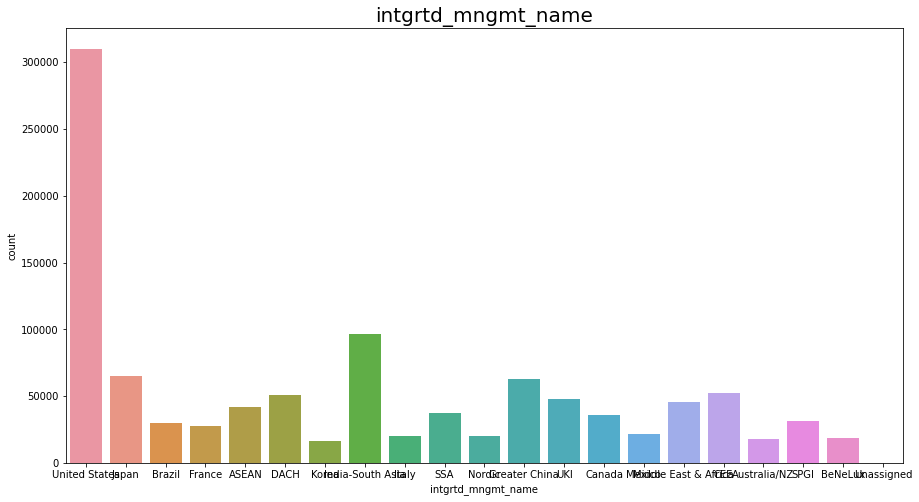

In [0]:
## Let us see how the column intgrtd_mngmt_name looks like ##
plt.figure(figsize=(15,8))                    ## This gives us a box of 15 by 8 
sns.countplot(x=data['intgrtd_mngmt_name'])   ## Plotting for this column keeping it in x axis 
plt.title('intgrtd_mngmt_name',size=20)       ## Title 

Text(0.5, 1.0, 'intgrtd_mngmt_name')

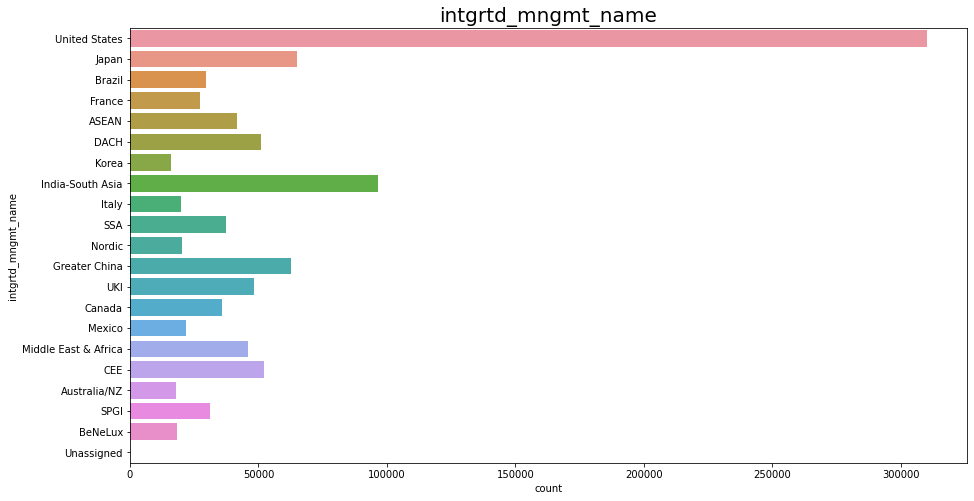

In [0]:
## As the country names are overlaying , let us plot it in Y axis ##
plt.figure(figsize=(15,8))                    ## This gives us a box of 15 by 8 
sns.countplot(y=data['intgrtd_mngmt_name'])   ## Plotting for this column keeping it in y axis 
plt.title('intgrtd_mngmt_name',size=20)       ## Title 

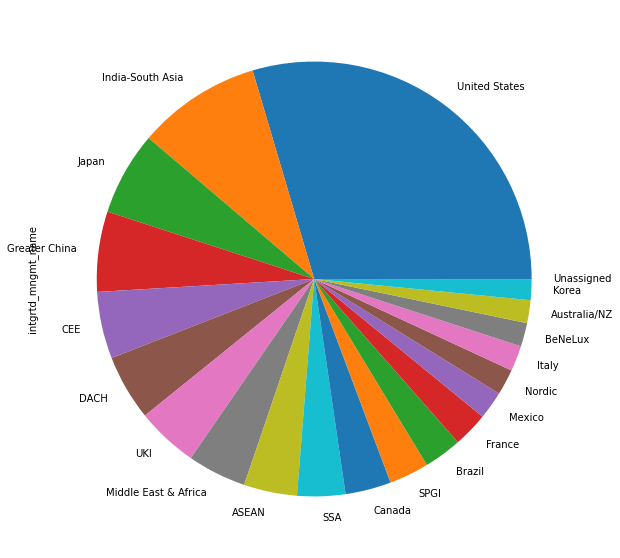

In [0]:
## Let us try to see this in a Pie representation 
# plt.pie(data['intgrtd_mngmt_name'])
# plt.show()
plt.figure(figsize=(10,10))
data.intgrtd_mngmt_name.value_counts().plot.pie()

In [0]:
## Let us draw a Pivot table 
a = data.pivot_table(['ip_addr'],('ctry_name'),aggfunc = 'count')
a = a.sort_values('ip_addr',ascending=False).head(20)

Text(0.5, 1.0, 'County Which Most Traffic is from ?')

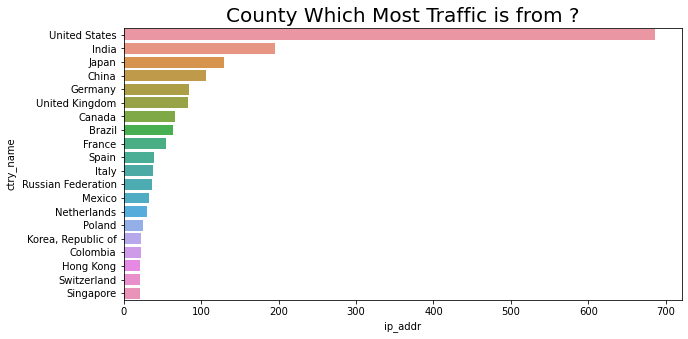

In [0]:
plt.figure(figsize=(10,5))
sns.barplot(a.ip_addr,a.index)
plt.title("County Which Most Traffic is from ?",size=20)

## From the above plot we understand that most traffic is from US, INDIA and JAPAN## 

Text(0.5, 1.0, 'which is most used OS?')

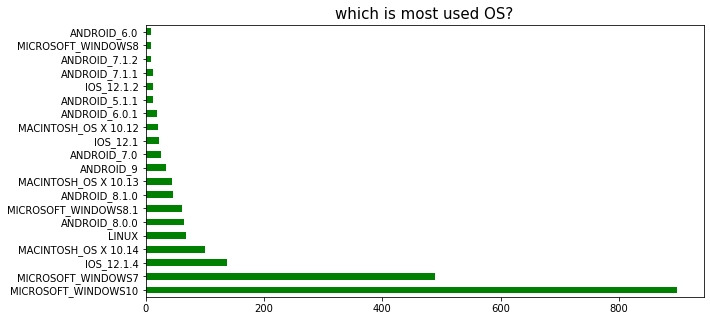

In [0]:
## Let us see which is the most used OS ? ## 
plt.figure(figsize=(10,5))
data.operating_sys.value_counts().head(20).plot.barh(color = ('green'))
plt.title('which is most used OS?', size=15)

Text(0.5, 1.0, 'Which Website is Visited Most from most frequent 10?')

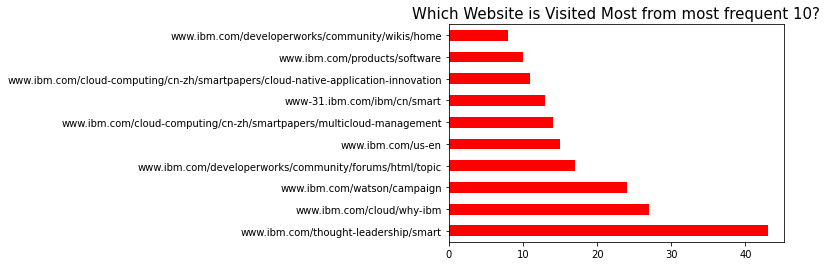

In [0]:
data.page_url.value_counts().head(10).plot.barh(color='red')
plt.title('Which Website is Visited Most from most frequent 10?',size=15)

In [0]:
data_usa = data[data.ctry_name == 'United States']

In [0]:
data_usa.shape

(309576, 18)

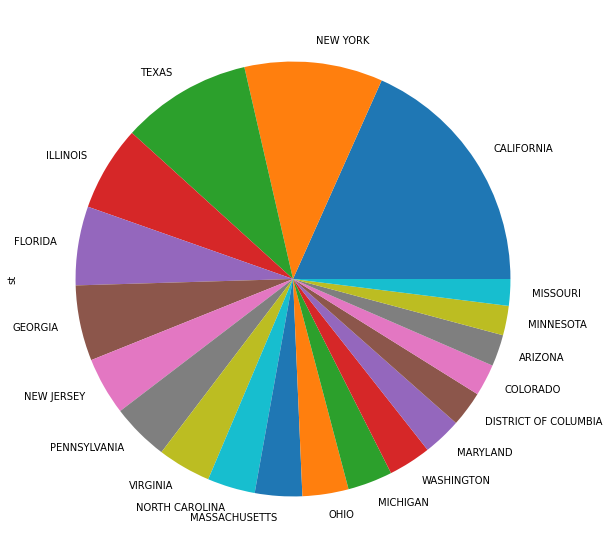

In [0]:
plt.figure(figsize=(10,10))
data_usa.st.value_counts().head(20).plot.pie()

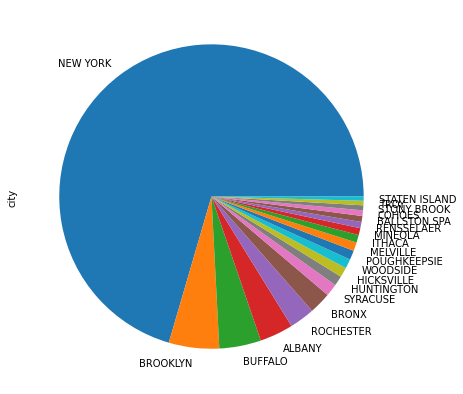

In [0]:
plt.figure(figsize=(7,7))
data_usa[data_usa.st == 'NEW YORK'].city.value_counts().head(20).plot.pie()

*italicized text*

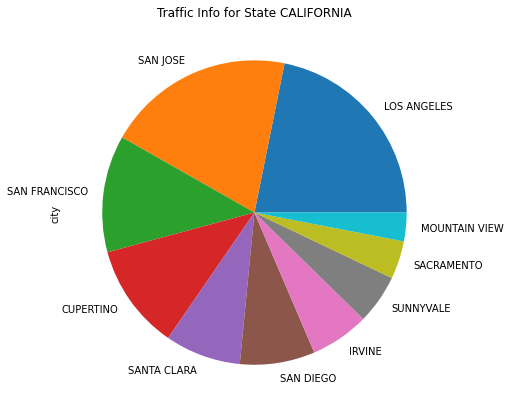

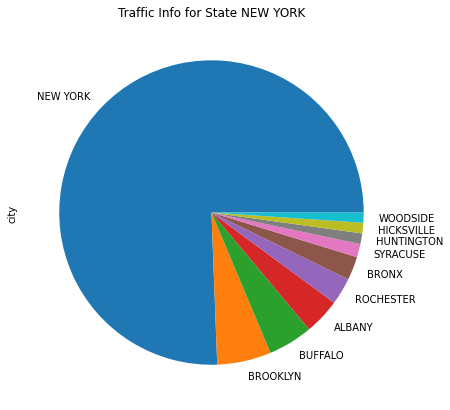

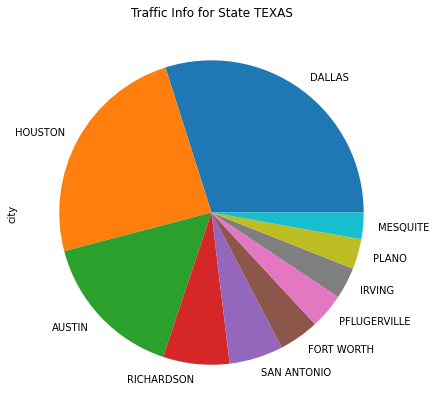

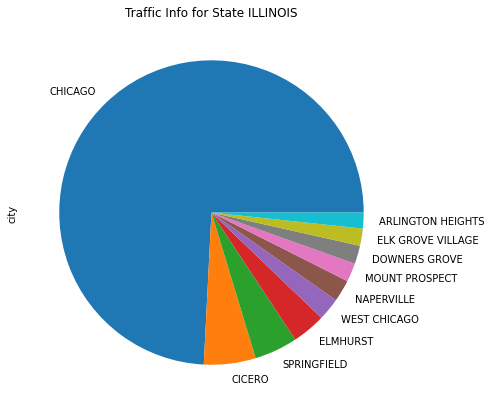

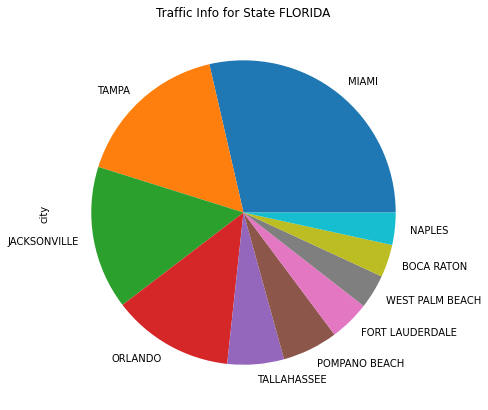

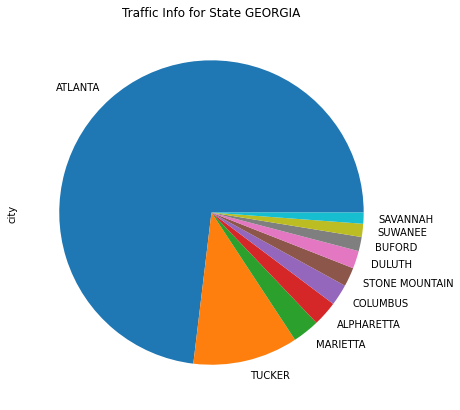

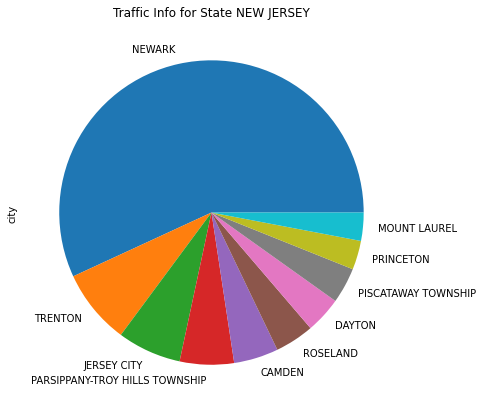

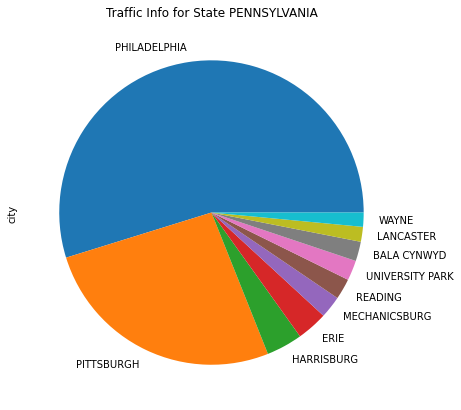

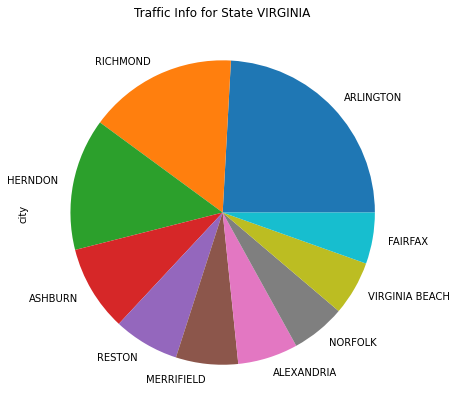

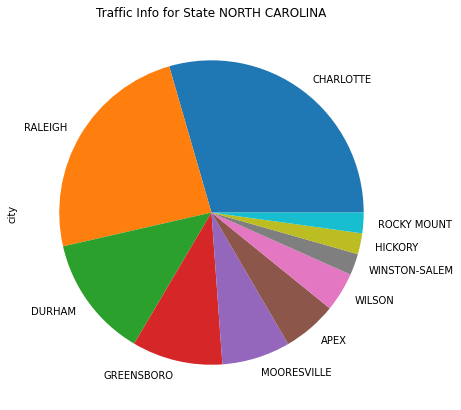

In [0]:
for i in data_usa.st.value_counts().head(10).index:
  plt.figure(figsize=(7,7))
  data_usa[data_usa.st == i].city.value_counts().head(10).plot.pie(title='Traffic Info for State '+i)
  plt.show()

In [0]:
data_usa.st.value_counts().head(10).index

Index(['CALIFORNIA', 'NEW YORK', 'TEXAS', 'ILLINOIS', 'FLORIDA', 'GEORGIA',
       'NEW JERSEY', 'PENNSYLVANIA', 'VIRGINIA', 'NORTH CAROLINA'],
      dtype='object')

In [0]:
data

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,date
date,,,,,,,,,,,,,,,,,,
2019-06-04 05:05:18.023100,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,2019-06-04 05:05:18.023100
2019-06-04 05:07:11.014300,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300,2019-06-04 05:07:11.014300
2019-06-04 05:08:46.081900,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900,2019-06-04 05:08:46.081900
2019-06-04 05:07:22.033300,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300,2019-06-04 05:07:22.033300
2019-06-04 05:05:27.027700,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700,2019-06-04 05:05:27.027700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-04 13:27:37.059600,United States,United States,North America,CUPERTINO,CALIFORNIA,NaN,MACINTOSH_OS X 10.14,e37ade1326801a855c9b2d1bdb1f84399547c27178a7e7...,MOZILLA/5.0 (MACINTOSH; INTEL MAC OS X 10_14_2...,1,0,1,www.ibm.com/talent-management/news/talent-acqu...,11,3,2019,2019-06-04 13:27:37.059600,2019-06-04 13:27:37.059600
2019-06-04 13:27:04.035100,Australia,Australia/NZ,Asia Pacific,SYDNEY,NEW SOUTH WALES,OPTUSNET.COM.AU,MACINTOSH_OS X 10.13,e926236cbc5da5db8bad29cdbb3537b867aa26e73a5f79...,MOZILLA/5.0 (MACINTOSH; INTEL MAC OS X 10_13_1...,1,0,1,www.ustream.tv/channel/nba4live,11,3,2019,2019-06-04 13:27:04.035100,2019-06-04 13:27:04.035100
2019-06-04 13:40:47.060500,United States,United States,North America,CLEVELAND,OHIO,PARKER.COM,MICROSOFT_WINDOWS10,3440973e4b965b19fa7e67b02c10ecb1d6ccc3c62e0d92...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,1,1,www.ibm.com/support/knowledgecenter/en/search/...,11,3,2019,2019-06-04 13:40:47.060500,2019-06-04 13:40:47.060500


## Preprocessing

In [0]:
ttt= ['date','ip_addr']
ttt = data[ttt]
ttt= ttt.set_index('date')
ttt = ttt.reset_index()
data['NoofTimes'] = 1 ## FOR COUNTING fREQUENCY OF OVERALL Visit

In [0]:
te = data.pivot_table(['date'],('ip_addr'),aggfunc=lambda x: len(x.unique()))

In [0]:
data['NoofTimes']

date
2019-06-04 05:05:18.023100    1
2019-06-04 05:07:11.014300    1
2019-06-04 05:08:46.081900    1
2019-06-04 05:07:22.033300    1
2019-06-04 05:05:27.027700    1
                             ..
2019-06-04 13:27:37.059600    1
2019-06-04 13:27:04.035100    1
2019-06-04 13:40:47.060500    1
2019-06-04 13:22:12.001900    1
2019-06-04 13:39:50.074200    1
Name: NoofTimes, Length: 1048573, dtype: int64

In [0]:
te

,date
ip_addr,
00000bfd838fedd4c2adff293a64d5efa3406b27053a10238440534d212470e8,3
00002f7fddaa273634e38ec7004224498baa7a46cf26407a425fa5a4c94aaaed,2
0000694257f2882ccebb6a5431a8ebca19063252492891fee7dbe26aee8560a3,1
0000a229c86f8baa193ffdcf9c2a88f83a91b9faad73f72e2ab9f7aa8ad6ff76,2
0000faf7927142fa7fbc189d4a1bf23e4eb0c8d3b49c622ffea57e6cd788cd64,1
...,...
ffffa1ae0a36534162e15078911536c8914a7a7f90c20f267fb4c62a40eec34d,12
ffffa68b238435f809c6ec7390520b9b74981a5b80681cb71ae8304417fcfb66,1
ffffa71a3d7210fbada572e51dfc5c923e26dce557043900aaf4dc8bc19228ac,1


In [0]:
data[data.ip_addr == '00002f7fddaa273634e38ec7004224498baa7a46cf26407a425fa5a4c94aaaed']

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,date,NoofTimes
date,,,,,,,,,,,,,,,,,,,
2019-06-04 18:34:07.011200,India,India-South Asia,Asia Pacific,GHAZIABAD,UTTAR PRADESH,AIRTELBROADBAND.IN,MICROSOFT_WINDOWS10,00002f7fddaa273634e38ec7004224498baa7a46cf2640...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,0,1,www.ibm.com/support/knowledgecenter/sslvmb_22....,11,3,2019,2019-06-04 18:34:07.011200,2019-06-04 18:34:07.011200,1
2019-06-04 03:00:18.013000,India,India-South Asia,Asia Pacific,GHAZIABAD,UTTAR PRADESH,AIRTELBROADBAND.IN,MICROSOFT_WINDOWS10,00002f7fddaa273634e38ec7004224498baa7a46cf2640...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64) APPL...,1,0,1,www.ibm.com/support/knowledgecenter/en/sslvmb_...,11,3,2019,2019-06-04 03:00:18.013000,2019-06-04 03:00:18.013000,1


In [0]:
temp = data.pivot_table(['NoofTimes','VIEWS','VISIT','ENGD_VISIT'],('ip_addr'),aggfunc='sum')

In [0]:
temp

,ENGD_VISIT,NoofTimes,VIEWS,VISIT
ip_addr,,,,
00000bfd838fedd4c2adff293a64d5efa3406b27053a10238440534d212470e8,0,3,4,4
00002f7fddaa273634e38ec7004224498baa7a46cf26407a425fa5a4c94aaaed,0,2,2,2
0000694257f2882ccebb6a5431a8ebca19063252492891fee7dbe26aee8560a3,0,1,1,1
0000a229c86f8baa193ffdcf9c2a88f83a91b9faad73f72e2ab9f7aa8ad6ff76,0,2,2,2
0000faf7927142fa7fbc189d4a1bf23e4eb0c8d3b49c622ffea57e6cd788cd64,0,1,1,1
...,...,...,...,...
ffffa1ae0a36534162e15078911536c8914a7a7f90c20f267fb4c62a40eec34d,10,12,14,13
ffffa68b238435f809c6ec7390520b9b74981a5b80681cb71ae8304417fcfb66,0,1,1,1
ffffa71a3d7210fbada572e51dfc5c923e26dce557043900aaf4dc8bc19228ac,1,1,1,1


In [0]:
temp['indays'] = te['date']

In [0]:
temp

,ENGD_VISIT,NoofTimes,VIEWS,VISIT,indays
ip_addr,,,,,
00000bfd838fedd4c2adff293a64d5efa3406b27053a10238440534d212470e8,0,3,4,4,3
00002f7fddaa273634e38ec7004224498baa7a46cf26407a425fa5a4c94aaaed,0,2,2,2,2
0000694257f2882ccebb6a5431a8ebca19063252492891fee7dbe26aee8560a3,0,1,1,1,1
0000a229c86f8baa193ffdcf9c2a88f83a91b9faad73f72e2ab9f7aa8ad6ff76,0,2,2,2,2
0000faf7927142fa7fbc189d4a1bf23e4eb0c8d3b49c622ffea57e6cd788cd64,0,1,1,1,1
...,...,...,...,...,...
ffffa1ae0a36534162e15078911536c8914a7a7f90c20f267fb4c62a40eec34d,10,12,14,13,12
ffffa68b238435f809c6ec7390520b9b74981a5b80681cb71ae8304417fcfb66,0,1,1,1,1
ffffa71a3d7210fbada572e51dfc5c923e26dce557043900aaf4dc8bc19228ac,1,1,1,1,1


In [0]:
from sklearn.cluster import KMeans

In [0]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(temp)
temp['cluster'] = y_pred

In [0]:
temp

,ENGD_VISIT,NoofTimes,VIEWS,VISIT,indays,cluster
ip_addr,,,,,,
00000bfd838fedd4c2adff293a64d5efa3406b27053a10238440534d212470e8,0,3,4,4,3,0
00002f7fddaa273634e38ec7004224498baa7a46cf26407a425fa5a4c94aaaed,0,2,2,2,2,0
0000694257f2882ccebb6a5431a8ebca19063252492891fee7dbe26aee8560a3,0,1,1,1,1,0
0000a229c86f8baa193ffdcf9c2a88f83a91b9faad73f72e2ab9f7aa8ad6ff76,0,2,2,2,2,0
0000faf7927142fa7fbc189d4a1bf23e4eb0c8d3b49c622ffea57e6cd788cd64,0,1,1,1,1,0
...,...,...,...,...,...,...
ffffa1ae0a36534162e15078911536c8914a7a7f90c20f267fb4c62a40eec34d,10,12,14,13,12,0
ffffa68b238435f809c6ec7390520b9b74981a5b80681cb71ae8304417fcfb66,0,1,1,1,1,0
ffffa71a3d7210fbada572e51dfc5c923e26dce557043900aaf4dc8bc19228ac,1,1,1,1,1,0


In [0]:
temp[temp.cluster == 1]

,ENGD_VISIT,NoofTimes,VIEWS,VISIT,indays,cluster
ip_addr,,,,,,
00099b9633602eacab5e5dbe6f33bef809352883993334b9330266cb8d546fc1,15,131,143,133,131,1
006fce7b2ba8352d4b2a9efe18475fb017e1bc0c78f6e6c1885054af4c2c43cc,44,103,183,117,103,1
01250e1a334e6fc815c8b4cb0203ec0dc6420868ef804b78151115a8402a4a11,34,92,138,103,91,1
01ed20dd606cb2e8fb0c54282a8f52531fcb315122e14d170eb7fda5af44f948,31,124,199,131,124,1
021f5543dab749dc5d0bc162109961e196df4c4922356bf3832af96415223b25,89,221,299,233,221,1
...,...,...,...,...,...,...
ffa82df0719f32afe839d25f1b1de44e43e2b69477c762e2d35bf9a32f10e740,46,112,193,120,111,1
ffabc371272e20ac377ea0a6357a908c79d85a2cff7e08dd2468add3fb545d38,68,43,148,136,43,1
ffca302bc73b302318ed4e9343ced97445aad3396c894460faf30187308d6db9,44,102,131,119,102,1


In [0]:
temp

,ENGD_VISIT,NoofTimes,VIEWS,VISIT,indays,cluster
ip_addr,,,,,,
00000bfd838fedd4c2adff293a64d5efa3406b27053a10238440534d212470e8,0,3,4,4,3,0
00002f7fddaa273634e38ec7004224498baa7a46cf26407a425fa5a4c94aaaed,0,2,2,2,2,0
0000694257f2882ccebb6a5431a8ebca19063252492891fee7dbe26aee8560a3,0,1,1,1,1,0
0000a229c86f8baa193ffdcf9c2a88f83a91b9faad73f72e2ab9f7aa8ad6ff76,0,2,2,2,2,0
0000faf7927142fa7fbc189d4a1bf23e4eb0c8d3b49c622ffea57e6cd788cd64,0,1,1,1,1,0
...,...,...,...,...,...,...
ffffa1ae0a36534162e15078911536c8914a7a7f90c20f267fb4c62a40eec34d,10,12,14,13,12,0
ffffa68b238435f809c6ec7390520b9b74981a5b80681cb71ae8304417fcfb66,0,1,1,1,1,0
ffffa71a3d7210fbada572e51dfc5c923e26dce557043900aaf4dc8bc19228ac,1,1,1,1,1,0


In [0]:
dataf =  pd.merge(data,temp['cluster'],on='ip_addr',how= 'inner')

In [0]:
dataf.head()

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,date,NoofTimes,cluster
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,2019-06-04 05:05:18.023100,1,0
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300,2019-06-04 05:07:11.014300,1,0
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900,2019-06-04 05:08:46.081900,1,0
3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300,2019-06-04 05:07:22.033300,1,0
4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700,2019-06-04 05:05:27.027700,1,0


In [0]:
dataf.drop('NoofTimes',axis=1)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,date,cluster
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,2019-06-04 05:05:18.023100,0
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300,2019-06-04 05:07:11.014300,0
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900,2019-06-04 05:08:46.081900,0
3,Brazil,Brazil,Latin America,SAO FRANCISCO DE GOIAS,GOIAS,VIVOZAP.COM.BR,ANDROID_6.0,cb9ffa7be250fc62426a431a4f08bc0c8222f63514ba39...,MOZILLA/5.0 (LINUX; ANDROID 6.0; PT-BR; 5010E ...,1,0,1,www.ibm.com/analytics/br/pt/business-intelligence,11,3,2019,2019-06-04 05:07:22.033300,2019-06-04 05:07:22.033300,0
4,France,France,Europe,BEZONS,VAL-D'OISE,PROXAD.NET,ANDROID_9,7ce278be1b02a0253cc0219fa9ceddfe8e91846be343a4...,MOZILLA/5.0 (LINUX; ANDROID 9; SM-G965F BUILD/...,1,0,1,www.ibm.com/watson/fr-fr,11,3,2019,2019-06-04 05:05:27.027700,2019-06-04 05:05:27.027700,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,Germany,DACH,Europe,OBERGIESING-FASANGARTEN,BAYERN,T-IPCONNECT.DE,MICROSOFT_WINDOWS10,7efdbb07f7f67a86ab4c3f963164a9df9637dc30c9a719...,MOZILLA/5.0 (WINDOWS NT 10.0; WIN64; X64; RV:6...,1,0,2,align.ustream.tv/channel/23518593/video/120482317,11,3,2019,2019-06-04 13:50:11.032200,2019-06-04 13:50:11.032200,0
1048569,Italy,Italy,Europe,MILANO,MILANO,TELECOMITALIA.IT,MICROSOFT_WINDOWS7,480a9b37af77dd87d8e054c11044fc7d5a9a5d845fd843...,MOZILLA/5.0 (WINDOWS NT 6.1; WIN64; X64) APPLE...,1,0,1,www.ibm.com/watson/it-it,11,3,2019,2019-06-04 13:53:23.057400,2019-06-04 13:53:23.057400,0
1048570,Indonesia,ASEAN,Asia Pacific,JAKARTA,JAKARTA RAYA,NaN,ANDROID_5.1,adfca740c9fe06fd7190d70131cb6718a4bec09b485e4b...,MOZILLA/5.0 (LINUX; ANDROID 5.1; X9009) APPLEW...,1,0,1,www.iot-academy.info/index.php/en-us,11,3,2019,2019-06-04 13:22:04.047700,2019-06-04 13:22:04.047700,0
1048571,United States,United States,North America,CUPERTINO,CALIFORNIA,NaN,MACINTOSH_OS X 10.14,e37ade1326801a855c9b2d1bdb1f84399547c27178a7e7...,MOZILLA/5.0 (MACINTOSH; INTEL MAC OS X 10_14_2...,1,0,1,www.ibm.com/talent-management/news/talent-acqu...,11,3,2019,2019-06-04 13:27:37.059600,2019-06-04 13:27:37.059600,0


## Task to do

# Make visualization with clustered formed dataframe named 'dataf'
## cluster basically specifies 0 or 1 visualize it and determing which cluster is bot cluster

## We will be seeing and discussing each and everyone's notebook in next session so everyone should make visualization

* Questions to be answered in next session.
1. Visualize Which Cluster according to you is Bot Cluster ?
2. Any other solution or idea on how to solve this problem Statement ?

In [0]:
## New Visualization on this dataset

In [0]:
dataf.head(3)

,ctry_name,intgrtd_mngmt_name,intgrtd_operating_team_name,city,st,sec_lvl_domn,operating_sys,ip_addr,user_agent,VISIT,ENGD_VISIT,VIEWS,page_url,wk,mth,yr,page_vw_ts,date,NoofTimes,cluster
0,United States,United States,North America,SLIDELL,LOUISIANA,CHARTER.COM,IOS_12.1.4,287e8e9aeedb50e963906f10cca7ca26ae830154e69220...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_4 LIKE...,1,0,1,www.ibm.com/watson/campaign,11,3,2019,2019-06-04 05:05:18.023100,2019-06-04 05:05:18.023100,1,0
1,Japan,Japan,Japan,TOKYO,TOKYO,MOPERA.NET,ANDROID_6.0,d7746df5cc2de7f79584d57c2c082b9acc7697602021a1...,MOZILLA/5.0 (LINUX; ANDROID 6.0; D-01J BUILD/H...,1,0,1,www.ibm.com/privacy/us/en,11,3,2019,2019-06-04 05:07:11.014300,2019-06-04 05:07:11.014300,1,0
2,United States,United States,North America,ELK GROVE,CALIFORNIA,COMCASTBUSINESS.NET,IOS_12.1.2,8540464f5f376c7a160d63632f8cbedc96c61158daf9ae...,MOZILLA/5.0 (IPHONE; CPU IPHONE OS 12_1_2 LIKE...,1,0,1,www.ibm.com/account/reg/us-en/signup?formid=ur...,11,3,2019,2019-06-04 05:08:46.081900,2019-06-04 05:08:46.081900,1,0
